# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here

import pandas as pd
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
!pip install palmerpenguins

import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Clean Data
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
# Define the target variable (y)
y = penguins['bill_depth_mm']

# Define the predictor variables (x)
X = penguins.drop('bill_depth_mm', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
#  Dummify all species, island and sex

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number)),
    ("polynomial", PolynomialFeatures(2), ['bill_length_mm'])
  ],
  remainder = "passthrough"
)



Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [6]:
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)


In [7]:
# Fit the pipeline
lr_pipeline.fit(X_train, y_train)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c3050a42590>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c3050a42b90>),
                                                 ('polynomial',
                                                  PolynomialFeatures(),
                                                  ['bill_length_mm'])])),
                ('linear_regression', LinearRegression())])

In [8]:

# Linear Regression
y_train_pred_lr = lr_pipeline.predict(X_train)
y_test_pred_lr = lr_pipeline.predict(X_test)

train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

print("Multiple Linear Regression:")
print("Train MSE:", train_mse_lr)
print("Test MSE:", test_mse_lr)


# KNN models
knn_pipeline_1 = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsRegressor(n_neighbors=3))]
)
knn_pipeline_1.fit(X_train, y_train)

y_train_pred_knn_1 = knn_pipeline_1.predict(X_train)
y_test_pred_knn_1 = knn_pipeline_1.predict(X_test)
train_mse_knn_1 = mean_squared_error(y_train, y_train_pred_knn_1)
test_mse_knn_1 = mean_squared_error(y_test, y_test_pred_knn_1)

print("\nKNN (K=3):")
print("Train MSE:", train_mse_knn_1)
print("Test MSE:", test_mse_knn_1)

knn_pipeline_2 = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsRegressor(n_neighbors=5))]
)
knn_pipeline_2.fit(X_train, y_train)

y_train_pred_knn_2 = knn_pipeline_2.predict(X_train)
y_test_pred_knn_2 = knn_pipeline_2.predict(X_test)
train_mse_knn_2 = mean_squared_error(y_train, y_train_pred_knn_2)
test_mse_knn_2 = mean_squared_error(y_test, y_test_pred_knn_2)

print("\nKNN (K=5):")
print("Train MSE:", train_mse_knn_2)
print("Test MSE:", test_mse_knn_2)


# Decision Tree Model
dt_pipeline = Pipeline(
    [("preprocessing", ct),
     ("decision_tree", DecisionTreeRegressor())]
)
dt_pipeline.fit(X_train, y_train)

y_train_pred_dt = dt_pipeline.predict(X_train)
y_test_pred_dt = dt_pipeline.predict(X_test)
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)


print("\nDecision Tree:")
print("Train MSE:", train_mse_dt)
print("Test MSE:", test_mse_dt)

Multiple Linear Regression:
Train MSE: 0.5802890288189879
Test MSE: 0.7131318874943849

KNN (K=3):
Train MSE: 1.4248282016956717
Test MSE: 3.708809523809522

KNN (K=5):
Train MSE: 1.7543662650602407
Test MSE: 3.520290476190475

Decision Tree:
Train MSE: 0.0
Test MSE: 1.3434523809523813



The best model based on test MSE is: Linear Regression


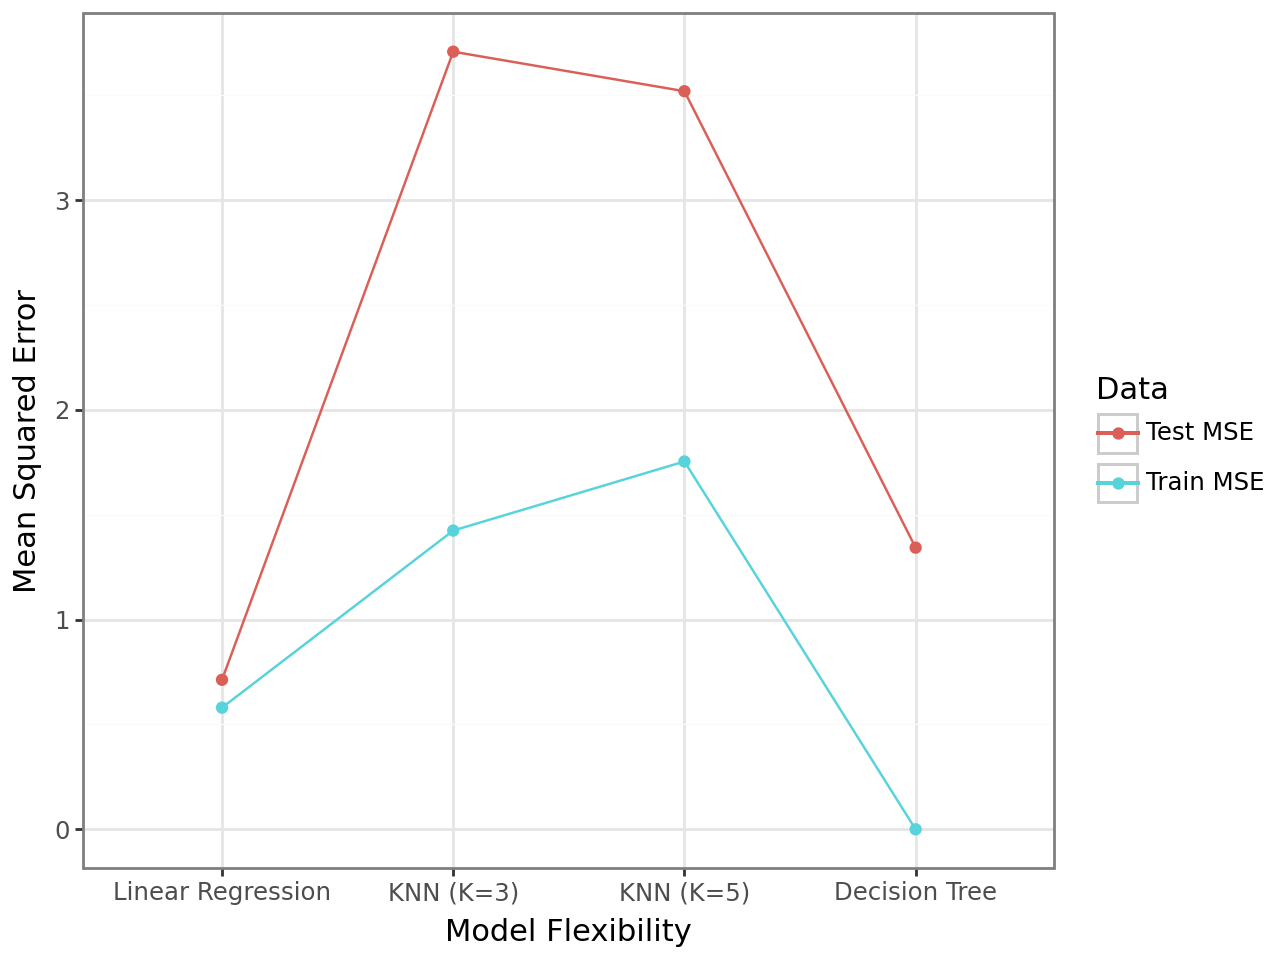

In [9]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_bw

df_mse = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN (K=3)', 'KNN (K=5)', 'Decision Tree'],
    'Train MSE': [train_mse_lr, train_mse_knn_1, train_mse_knn_2, train_mse_dt],
    'Test MSE': [test_mse_lr, test_mse_knn_1, test_mse_knn_2, test_mse_dt]
})

df_mse_long = pd.melt(df_mse, id_vars=['Model'], var_name='Data', value_name='MSE')

df_mse_long['Model'] = pd.Categorical(df_mse_long['Model'], categories=['Linear Regression', 'KNN (K=3)', 'KNN (K=5)', 'Decision Tree'], ordered=True)
df_mse_long = df_mse_long.sort_values(by='Model')

plot = (
    ggplot(df_mse_long, aes(x='Model', y='MSE', color='Data', group='Data')) +
    geom_line() +
    geom_point() +
    labs(x="Model Flexibility", y="Mean Squared Error") +
    theme_bw()
)

plot

# Determine the best model based on test MSE
best_model = df_mse.loc[df_mse['Test MSE'].idxmin(), 'Model']
print(f"\nThe best model based on test MSE is: {best_model}")
plot


The best-performing model based on the results is **Linear Regression**, which achieves the lowest Test Mean Squared Error (MSE) of 0.71. This indicates that it generalizes well to unseen data, making it the most reliable model for predictive accuracy. On the other hand, the K-Nearest Neighbors (KNN) models with K=3 and K=5 have significantly higher Test MSE values of 3.71 and 3.52, respectively, suggesting that they fail to generalize and may struggle with capturing the overall patterns in the data. The Decision Tree model perfectly fits the training data with a Train MSE of 0.0, but this comes at the cost of severe overfitting, as evidenced by its higher Test MSE of 1.34. In comparison, Linear Regression not only avoids overfitting but also demonstrates the best balance between fitting the training data and maintaining generalization to new data, making it the most effective model for this problem.